In [47]:
import torch
from torch.optim.lr_scheduler import (LambdaLR, CosineAnnealingLR, CosineAnnealingWarmRestarts, 
                                      LinearLR, CyclicLR, OneCycleLR, ReduceLROnPlateau)
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
def similate_train(num_epochs, num_iter_per_epoch, Scheduler, lr_params):
    net = torch.nn.Linear(4, 1)
    opt = torch.optim.Adam(net.parameters(), lr=0.01)
    scheduler = Scheduler(opt, **lr_params)
    lr_records = []
    for e in range(num_epochs):
        for batch in range(num_iter_per_epoch):
            lr_records.append(opt.param_groups[0]['lr'])
            scheduler.step(e+(batch+1)/num_iter_per_epoch)
    return lr_records

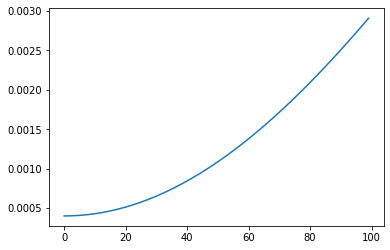

In [48]:
plt.plot(similate_train(10, 10, OneCycleLR, {'max_lr': 0.01, 'total_steps': 100}))

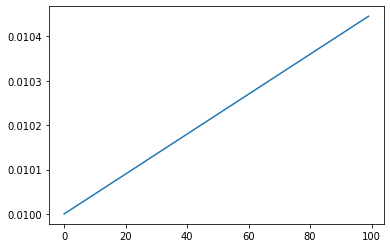

In [49]:
plt.plot(similate_train(10, 10, CyclicLR, {'base_lr': 0.01, 'max_lr': 0.1, 'cycle_momentum': False}))

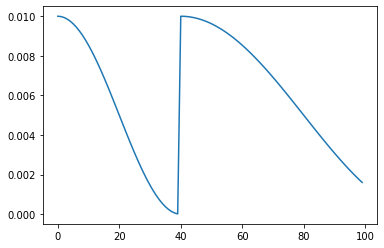

In [50]:
plt.plot(similate_train(10, 10, CosineAnnealingWarmRestarts, {'T_0': 4, 'T_mult': 2}))

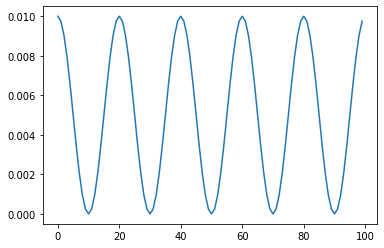

In [51]:
plt.plot(similate_train(10, 10, CosineAnnealingLR, {'T_max': 1}))

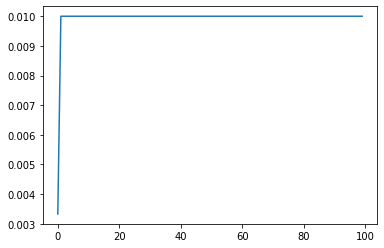

In [52]:
plt.plot(similate_train(10, 10, LinearLR, {'total_iters': -1}))